## MNIST - best model

In the following cell we load our best MNIST model and show 4 samples from it

In [ ]:
# load model, show a few samples, FID score
import torch
from models.ddpm import DDPM
import numpy as np
from networks.score_network import score_network_0
import matplotlib.pyplot as plt
from visualizer import plot_samples

NUM_SAMPLES = 4

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

results_path = "../results/mnist/best/"

ddpm = DDPM(device=device, network=score_network_0(), p_unconditional=1, scheduler="linear")
ddpm.load(f"{results_path}")

samples = []	

for i in range(NUM_SAMPLES):
    sample, sample_steps = ddpm.sample()
    samples.append(sample.view(1, 28, 28))
    print(f"Sample {i+1} generated")

samples = torch.cat(samples, dim=0)
samples = samples.cpu().numpy()
sampled_data = np.asarray(samples)

plot_samples(samples, None)

We now also look at the FID score for this model by loading previously sampled 30000 points and caluclating the FID.

In [3]:
from data.data_loader import data_loader
from metrics import fid_score

NUM_SAMPLES = 30000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

samples_1 = np.load("../results/mnist/best/samples_1.npy")
samples_2 = np.load("../results/mnist/best/samples_2.npy")


sampled_data = np.concatenate((samples_1, samples_2), axis=0).reshape(NUM_SAMPLES, 1, 28, 28)

train_data_loader = data_loader("MNIST", 64, device)
train_data = train_data_loader.x_train.view(-1, 1, 28, 28).cpu().numpy()[:NUM_SAMPLES, :]

score = fid_score(sampled_data, train_data, batch_size=50)

print(f"FID score for {NUM_SAMPLES} samples on train set: {score}")

FID score for 30000 samples on train set: 3.4794166376223714


## MNIST - CFG 

We now load our best CFG model and show it can sample with a given label, we use "4".
We now use the `score_network_1` class.

torch.Size([1000, 28])
Sample 1 generated
Sample 2 generated
Sample 3 generated
Sample 4 generated
0 sample
1 sample


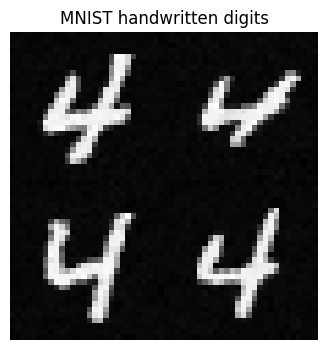

In [4]:
# load model, show a few samples, FID score
import torch
from models.ddpm import DDPM
import numpy as np
from networks.score_network import score_network_1
import matplotlib.pyplot as plt
from visualizer import plot_samples

NUM_SAMPLES = 4

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

results_path = "../results/cfg/best"

ddpm = DDPM(device=device, network=score_network_1(), p_unconditional=0.1, scheduler="cosine")
ddpm.load(f"{results_path}")

samples = []	

for i in range(NUM_SAMPLES):
    sample, sample_steps = ddpm.sample(label=4, w=3)
    samples.append(sample.view(1, 28, 28))
    print(f"Sample {i+1} generated")

samples = torch.cat(samples, dim=0)
samples = samples.cpu().numpy()
sampled_data = np.asarray(samples)

plot_samples(samples, None)

We now also look at the FID score for this model by loading previously sampled __ points and caluclating the FID.

In [ ]:
# load samples, calculate fid, print it...
NUM_SAMPLES = 10000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

samples_1 = np.load("../results/cfg/best/1000_samples_epoch_500.npy")


sampled_data = samples_1.reshape(NUM_SAMPLES, 1, 28, 28)

train_data_loader = data_loader("MNIST", 64, device)
train_data = train_data_loader.x_train.view(-1, 1, 28, 28).cpu().numpy()[:NUM_SAMPLES, :]

score = fid_score(sampled_data, train_data, batch_size=50)

print(f"FID score for {NUM_SAMPLES} samples on train set: {score}")